In [100]:
import pandas as pd

In [101]:
data = pd.read_excel("Data analytics Challenge.xlsx", sheet_name="HR")

In [102]:
data.head()

,Month,#Employee,Form,SalesSystemCode,Payroll Type,Nombre,Title,Sex,BIRTH DATE,Starting date,...,Características (S),Características (C),Motivación (D),Motivación (I),Motivación (S),Motivación (C),Bajo Stress (D),Bajo Stress (I),Bajo Stress (S),Bajo Stress (C)
0,2017-12-01,91818,Tele,91818,Insourcing,NaN,SALES SUPERVISOR,M,1982-11-05,2012-04-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-01,1812446,People,802446,Third Party,NaN,SALES EXECUTIVE,F,1987-09-24,2017-04-10,...,20.0,25.0,85.0,95.0,11.0,7.0,60.0,86.0,40.0,60.0
2,2017-12-01,1812380,People,2380,Third Party,NaN,SALES EXECUTIVE,F,1981-01-13,2017-03-13,...,48.0,34.0,75.0,74.0,58.0,33.0,69.0,60.0,60.0,48.0
3,2017-12-01,700865,Stratego,700865,Third Party,NaN,SALES EXECUTIVE,M,1986-04-18,2015-01-22,...,75.0,85.0,40.0,74.0,65.0,84.0,79.0,6.0,89.0,84.0
4,2017-12-01,1812531,People,802531,Third Party,NaN,SALES EXECUTIVE,F,1991-06-24,2017-05-18,...,40.0,94.0,59.0,25.0,65.0,93.0,79.0,18.0,30.0,92.0


In [103]:
data["Fulfilment %"]

0       1.024862
1       0.796296
2       2.268519
3       1.379630
4       0.842593
5       0.842593
6       1.194444
7       1.083333
8       0.944444
9       1.629630
10      0.333333
11      1.037037
12      0.296296
13      1.000000
14      0.953704
15      0.907407
16      0.907407
17      0.925926
18      0.583333
19      0.657407
20      1.064815
21      0.814815
22      0.750000
23      0.944444
24      0.388889
25      0.870370
26      0.453704
27      0.620370
28      0.925416
29      0.592593
          ...   
2410    1.056818
2411    1.306818
2412    0.954545
2413    1.045455
2414    0.886364
2415    0.931818
2416    1.068182
2417    0.693182
2418    1.159091
2419    1.194318
2420    1.477273
2421    1.295455
2422    1.954545
2423    1.284091
2424    1.193182
2425    0.897727
2426    1.000000
2427    1.022727
2428    0.795455
2429    1.022727
2430    1.041775
2431    0.977778
2432    1.000000
2433    0.695652
2434    1.222222
2435    1.288889
2436    0.600000
2437    1.1555

#### At this point, deciding what data is important and which of those I will need in developing a model is my next step and i will be choosing that right away. obviously not every data is useful for every context.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

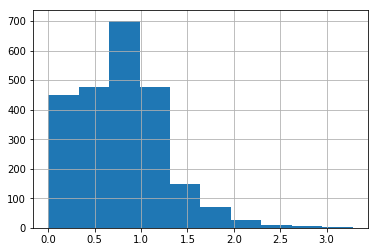

In [5]:
data['Fulfilment %'].hist()

In [93]:
new_data = data[['Month','Payroll Type', 'Title', 'Sex', 'BASE', 'TRANSPORTE', 'Commission_Target','Nationality','Sales Quota (points)', 'Real (points)', 'Fulfilment %', 'Commission Accrued', 'OA Commission Accrued','Clawback', 'Other Commissions', 'Commission paid']]


#Chosen features from the dataset.
#Target variable is "Fulfilment"

In [94]:
new_data.head()

,Month,Payroll Type,Title,Sex,BASE,TRANSPORTE,Commission_Target,Nationality,Sales Quota (points),Real (points),Fulfilment %,Commission Accrued,OA Commission Accrued,Clawback,Other Commissions,Commission paid
0,2017-12-01,Insourcing,SALES SUPERVISOR,M,895,350,708.33,INT,1810.0,1855.0,1.024862,708.33,653.66,0.00,0.00,1361.99
1,2017-12-01,Third Party,SALES EXECUTIVE,F,700,250,583.33,INT,108.0,86.0,0.796296,583.33,87.50,24.33,0.00,646.51
2,2017-12-01,Third Party,SALES EXECUTIVE,F,700,250,583.33,INT,108.0,245.0,2.268519,583.33,1494.79,144.90,9.16,1942.38
3,2017-12-01,Third Party,SALES EXECUTIVE,M,700,250,583.33,INT,108.0,149.0,1.379630,583.33,794.79,36.77,9.16,1350.52
4,2017-12-01,Third Party,SALES EXECUTIVE,F,700,250,583.33,INT,108.0,91.0,0.842593,583.33,160.42,0.00,0.00,743.75


In [95]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 16 columns):
Month                    2440 non-null datetime64[ns]
Payroll Type             2440 non-null object
Title                    2440 non-null object
Sex                      2440 non-null object
BASE                     2440 non-null int64
TRANSPORTE               2440 non-null int64
Commission_Target        2440 non-null float64
Nationality              2440 non-null object
Sales Quota (points)     2365 non-null float64
Real (points)            2366 non-null float64
Fulfilment %             2367 non-null float64
Commission Accrued       2440 non-null float64
OA Commission Accrued    2440 non-null float64
Clawback                 2440 non-null float64
Other Commissions        2440 non-null float64
Commission paid          2440 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(2), object(4)
memory usage: 305.1+ KB


### Result from this code shows that from the data chosen we have missing data in the following columns:

* nationality 
* Sales Quota (points)
* Real (points)
* Fulfillment %

In [47]:
(new_data['Nationality'] == "INT").sum()

2425

In [48]:
(new_data['Nationality'] == "EXT").sum()

14

In [61]:
#Now there is one missing value in Nationality and we are going to fill it with "INT" since
# that seems to be the most common Nationality

new_data['Nationality']= new_data['Nationality'].fillna(value="INT")

/home/jephtah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [168]:
#Fixing the Missing values for SALES QUOTA POINT using the mode
#strategy as most of the quotas are the same from my inspection

new_data['Sales Quota (points)']= new_data['Sales Quota (points)'].fillna(value=new_data["Sales Quota (points)"].mean())

In [171]:
#Fixing the Missing values for Real points using the mean
#strategy as most of the points are really disparate

new_data['Real (points)']= new_data['Real (points)'].fillna(value=new_data["Real (points)"].mean())
new_data["Real (points)"].isna().sum()

0

In [150]:
#Fixing the Missing values for Fulfilment percentage

new_data['Fulfilment %']= new_data['Fulfilment %'].fillna(value=new_data["Fulfilment %"].mean())

In [10]:
# Acquiring the number of titles that exist
new_data["Title"].count()

2440

In [14]:
#Checking for unique titles
new_data["Title"].unique()

array(['SALES SUPERVISOR', 'SALES EXECUTIVE', 'SALES EXECUTIVE '],
      dtype=object)

In [39]:
#Now it is clear that all that exists between 'SALES EXECUTIVE' and 'SALES EXECUTIVE '
#nothing but a typographical error, therefore to fix that

Tit = list(new_data["Title"])
Tat = []
for i in Tit:
    i = str(i).strip()
    Tat.append(i)
new_data["Title"]=pd.Series(Tat)

/home/jephtah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
new_data["Title"].unique()

#Here we see this is fixed and we no longer have three unique titles

array(['SALES SUPERVISOR', 'SALES EXECUTIVE'], dtype=object)

In [164]:
(new_data["Title"] == "SALES SUPERVISOR").sum()

72

In [165]:
(new_data["Title"] == "SALES EXECUTIVE").sum()

2227

In [169]:
new_data["Sales Quota (points)"].isna().sum()

0

### Handling the Categorical Data
* To handle the categorical data, I need to put them in a format that they can be utilized by the machine learning algorithms
* A good way to achieve that is to use the get_dummies method which is similar to the one_hot encoding method but offers us a more convenient way to achieve this.

In [173]:
dat = pd.get_dummies( new_data[['Payroll Type', 'Title', 'Sex', 'BASE', 'TRANSPORTE', 'Commission_Target','Nationality','Sales Quota (points)', 'Real (points)', 'Fulfilment %', 'Commission Accrued', 'OA Commission Accrued','Clawback', 'Other Commissions', 'Commission paid']], drop_first=True)

In [104]:
dat.set_index("Month")

,BASE,TRANSPORTE,Commission_Target,Sales Quota (points),Real (points),Fulfilment %,Commission Accrued,OA Commission Accrued,Clawback,Other Commissions,Commission paid,Payroll Type_Third Party,Title_SALES EXECUTIVE,Title_SALES SUPERVISOR,Sex_M,Nationality_INT
Month,,,,,,,,,,,,,,,,
2017-12-01,895,350,708.33,1810.0,1855.0,1.024862,708.33,653.66,0.00,0.00,1361.99,0,0,1,1,1
2017-12-01,700,250,583.33,108.0,86.0,0.796296,583.33,87.50,24.33,0.00,646.51,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,245.0,2.268519,583.33,1494.79,144.90,9.16,1942.38,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,149.0,1.379630,583.33,794.79,36.77,9.16,1350.52,1,0,0,1,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,0.00,0.00,743.75,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,36.77,9.16,716.14,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,129.0,1.194444,583.33,648.96,36.77,0.00,1195.53,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,117.0,1.083333,291.67,422.92,32.94,0.00,681.64,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,102.0,0.944444,583.33,320.83,0.00,0.00,904.17,1,0,0,1,1


#### Now to decide which of the Sales rep are performing well enough, we have to find a certain metric with which to measure their performance.
#### Once we find this metric, then we can use it as a standard to judge between those who perform excellently and those who do not.
#### Once we achieve this, we can go ahead to use this as a standard to even determine before hand a Sales rep that would perform well and the ones that won't.


In [112]:
dat = dat.set_index("Month")

In [174]:
dat

,BASE,TRANSPORTE,Commission_Target,Sales Quota (points),Real (points),Fulfilment %,Commission Accrued,OA Commission Accrued,Clawback,Other Commissions,Commission paid,Payroll Type_Third Party,Title_SALES EXECUTIVE,Title_SALES SUPERVISOR,Sex_M,Nationality_INT
Month,,,,,,,,,,,,,,,,
2017-12-01,895,350,708.33,1810.0,1855.0,1.024862,708.33,653.66,0.00,0.00,1361.99,0,0,1,1,1
2017-12-01,700,250,583.33,108.0,86.0,0.796296,583.33,87.50,24.33,0.00,646.51,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,245.0,2.268519,583.33,1494.79,144.90,9.16,1942.38,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,149.0,1.379630,583.33,794.79,36.77,9.16,1350.52,1,0,0,1,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,0.00,0.00,743.75,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,36.77,9.16,716.14,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,129.0,1.194444,583.33,648.96,36.77,0.00,1195.53,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,117.0,1.083333,291.67,422.92,32.94,0.00,681.64,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,102.0,0.944444,583.33,320.83,0.00,0.00,904.17,1,0,0,1,1


* Now i will be transforming the feature called "Fulfilment percentage" as that will be my target variable that is to say, I would like to make my judgements about the performance of a Sales rep base on their Fulfilment percentage



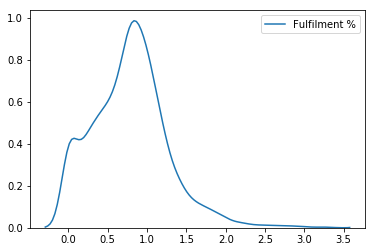

In [175]:
sns.kdeplot(dat["Fulfilment %"])

*Observing the trendline, I think setting a threshold of 40% would be a good choice for separating high performers from low performer*

In [176]:
Fulfilment = []
for i in dat["Fulfilment %"]:
    if i >= 0.4:
        i = 1 
    else:
        i = 0
        
    Fulfilment.append(i)

In [177]:
Fulfillment = pd.Series(Fulfilment)

*Now we have a pandas Series called Fulfillment which contains just 1s and 0s, just the exact sort of dat 
need for prediction, where 1 represents high performance (i.e  40% and above and 0 represents low performance i.e below 40 %)*

In [179]:
dat

,BASE,TRANSPORTE,Commission_Target,Sales Quota (points),Real (points),Fulfilment %,Commission Accrued,OA Commission Accrued,Clawback,Other Commissions,Commission paid,Payroll Type_Third Party,Title_SALES EXECUTIVE,Title_SALES SUPERVISOR,Sex_M,Nationality_INT
Month,,,,,,,,,,,,,,,,
2017-12-01,895,350,708.33,1810.0,1855.0,1.024862,708.33,653.66,0.00,0.00,1361.99,0,0,1,1,1
2017-12-01,700,250,583.33,108.0,86.0,0.796296,583.33,87.50,24.33,0.00,646.51,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,245.0,2.268519,583.33,1494.79,144.90,9.16,1942.38,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,149.0,1.379630,583.33,794.79,36.77,9.16,1350.52,1,0,0,1,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,0.00,0.00,743.75,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,91.0,0.842593,583.33,160.42,36.77,9.16,716.14,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,129.0,1.194444,583.33,648.96,36.77,0.00,1195.53,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,117.0,1.083333,291.67,422.92,32.94,0.00,681.64,1,0,0,0,1
2017-12-01,700,250,583.33,108.0,102.0,0.944444,583.33,320.83,0.00,0.00,904.17,1,0,0,1,1


### Time to create a model to represent this

In [180]:
X = dat.drop("Fulfilment %", axis=1)

In [181]:
y = Fulfillment

In [182]:
from sklearn.cross_validation import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
model = LogisticRegression()

In [187]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
predictions = model.predict(X_test)

### Evaluating the Model

In [193]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [194]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       146
          1       0.99      0.98      0.98       586

avg / total       0.97      0.97      0.97       732



In [195]:
confusion_matrix(y_test, predictions)

array([[140,   6],
       [ 13, 573]])

In [196]:
accuracy_score(y_test, predictions) * 100 #Accuracy of the model in percentage

97.40437158469946

### Note the model doesn't just boast an accuracy of 97% but also a very high reliability as indicated by the precision and recall scores, hence this model can accurately help detect a high performing Sales rep early enough

# 2: Having built the model, a very important question that needs to be answered is, how can we then improve the performance of the poorly performing reps